# GRIP : THE SPARKS FOUNDATION
## DATA SCIENCE AND BUSINESS ANALYTICS INTERN
## By : Swapna Sambhav Nayak (OCT2022-BATCH)
### TASK-1 : Prediction Using Supervised ML

In [1]:
# IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Remove unnecessary warning
import warnings as x
x.filterwarnings("ignore")

In [2]:
# Data read from link provided
data_141="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df=pd.read_csv(data_141)

# Lets observe a data sample from our dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Let's observe data dimension
df.shape

(25, 2)

In [4]:
# Let's check for missing values in our data
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

Text(0, 0.5, 'SCORES')

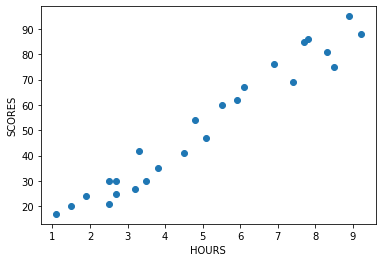

In [5]:
# Let's visualize the data distribution
# Using scatter Plot
plt.scatter(df['Hours'],df['Scores'])
plt.xlabel('HOURS')
plt.ylabel('SCORES')
# Data is linearly aligned in 2D-space

In [15]:
# since there is a linear re;ationship we can check for correlation between them
df.corr()
# This implies there is a positive correlation between the columns

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [6]:
# Now let's separate the input and output columns in to x and y 
X_141 = df.iloc[:,0:1]
y_141 = df.iloc[:,-1]
print(X_141)
print(y_141)

    Hours
0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8
0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64


In [7]:
# Performing train-test-split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_141,y_141,test_size=0.2,
                                                 random_state=2)

In [8]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()

# Now we train the model
linReg.fit(X_train,y_train)

LinearRegression()

In [9]:
X_test

,Hours
14,1.1
0,2.5
17,1.9
6,9.2
23,6.9


In [10]:
y_test

14    17
0     21
17    24
6     88
23    76
Name: Scores, dtype: int64

In [11]:
# Lets check for hour value=1.1 if we get scores value or not
linReg.predict(X_test.iloc[0].values.reshape(1,1))

array([12.44258714])

Text(0, 0.5, 'SCORES')

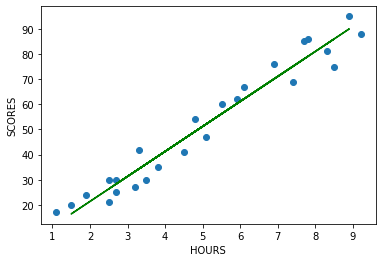

In [13]:
# lets visualize the model with data plot along with regression line
plt.scatter(df['Hours'],df['Scores'])
plt.plot(X_train,linReg.predict(X_train),color='green')
plt.xlabel('HOURS')
plt.ylabel('SCORES')

In [14]:
# This means that the linear regression algorithm found this line
# as the best fit. 
# Lets find the slope and y-intercept of the line
m=linReg.coef_
b=linReg.intercept_

# y= mx + b
# we have hour value 9.25
y = m*9.25 + b
print(y)

[93.45860056]


In [16]:
print('The predicted score value for 9.25 hour value is:-> ', y)

The predicted score value for 9.25 hour value is:->  [93.45860056]


In [21]:
# model evaluation
from sklearn import metrics

error = metrics.mean_absolute_error(y_test,linReg.predict(X_test))

print('Mean Absolute Error:-> ',error)

Mean Absolute Error:->  4.877039354964484


In [27]:
# Check for a performance score for our model
r2_score = linReg.score(X_test,y_test)
print(round(r2_score*100,2),'%')

97.36 %
